### Machine Learning Resource

A quick reference set for machine learning tasks based on Udacity's Intro to Machine Learning.

####    "The future belongs to the companies and people that turn data into products." M.Loukides, 2010.  
  
Data Science and Machine Learning are about the business challenges you’re trying to address, questions you’re looking ask and the data you have available or could look to acquire.

### Terminology

#### Features and Labels
Features - For a music exmample these may be: intensity, tempo, length

In classifier.fit(X, Y), 'X' are the features, and 'Y' are the labels.  
In a dataset the features are typically columns.


#### Udacity training data
https://www.udacity.com/course/intro-to-machine-learning--ud120  

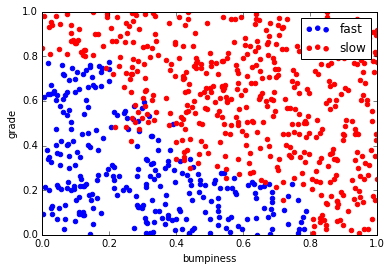

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
from prep_terrain_data import makeTerrainData
from class_vis_py35 import prettyPicture
from sklearn.metrics import accuracy_score
features_train, labels_train, features_test, labels_test = makeTerrainData()
### the training data (features_train, labels_train) have both "fast" and "slow"
### points mixed together--separate them so we can give them different colors
### in the scatterplot and identify them visually
grade_fast = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==0]
bumpy_fast = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==0]
grade_slow = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==1]
bumpy_slow = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==1]
#### initial visualization
plt.xlim(0.0, 1.0);plt.ylim(0.0, 1.0)
plt.scatter(bumpy_fast, grade_fast, color = "b", label="fast")
plt.scatter(grade_slow, bumpy_slow, color = "r", label="slow")
plt.legend()
plt.xlabel("bumpiness");plt.ylabel("grade")
plt.show()

### Supervised Classification
Supervised learning or classification refers to situations where there is a known correct label for a set of features or data points.



### Naive Bayes
http://scikit-learn.org/stable/modules/naive_bayes.html#gaussian-naive-bayes  

The algorithm looks at the probability of each attribute belonging to each class to make a prediction.  Naive Bayes classifers consider each feature to contribute independently to the probability of a particular label, regardless of the correlation amongst features.

An advantage of Naive Bayes is that it requires a relatively small amount of training data to form classifications.

Accuracy: 0.884


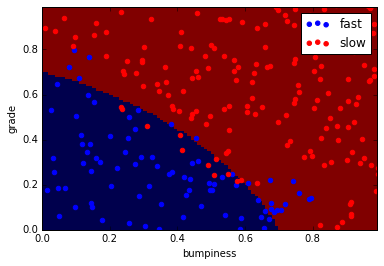

In [19]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

clf.fit(features_train,labels_train)
pred = clf.predict(features_test)
acc = accuracy_score(labels_test,pred); print("Accuracy:",acc)
prettyPicture(clf, features_test, labels_test)

### Support Vector Machines (SVM)
http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html  

Support Vector Machines algorithm works well in complex domains where there is clear separation in the data.  
They tend to function poorly in datasets with lots of noise, Naive Bayes may be a better alternative.

SVMs look to maximize the margin, where the magin is the distance between the closest datapoint and a line separating the classes.  The best solution is a line or plane separating the classes and is called the Maximal-Margin Hyperplane.

SVMs are implemented using Kernels.  Kernels provide additional flexibility to separate classes using non-linear and more complex hyperplanes.  


Accuracy: 0.92


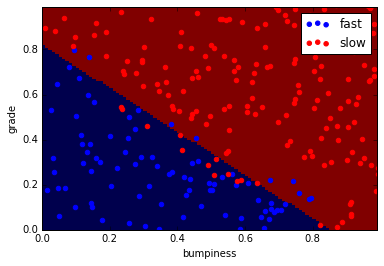

In [20]:
from sklearn.svm import SVC
clf = SVC(kernel='linear') #‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ 

clf.fit(features_train,labels_train)
pred = clf.predict(features_test)
acc = accuracy_score(labels_test,pred); print("Accuracy:",acc)
prettyPicture(clf, features_test, labels_test)

### Decision Trees
http://scikit-learn.org/stable/modules/tree.html  

Decision trees look to maximize Information Gain:
Information Gain = Entropy( Parent ) - [weighted average] Entropy( Children )  
Information gain is the difference between the disorder of the parent and the weighted average of the disorder of the children.  

Advantages include reduced data preparation, handles both numerical and categorical datasets, cost of using the tree is logarithmic in the number of data points used to train the tree.

Disadvantages, trees can be prone to overfitting (adjust minimum samples to split to resolve).





Accuracy: 0.912
Example of Decision Tree Over-Fitting


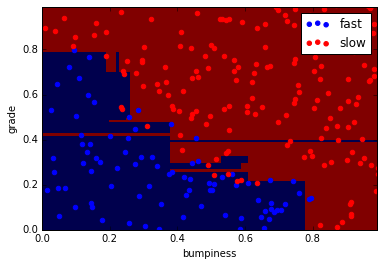

In [22]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(min_samples_split=2) # min_samples_split : int, optional (default=2)

clf.fit(features_train,labels_train)
pred = clf.predict(features_test)
acc = accuracy_score(labels_test,pred); print("Accuracy:",acc)
prettyPicture(clf, features_test, labels_test)
print("Example of Decision Tree Over-Fitting")

Accuracy: 0.912
Resolved over-fitting with min_samples_split


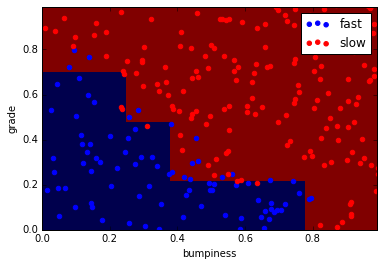

In [32]:
clf = tree.DecisionTreeClassifier(min_samples_split=42) # min_samples_split : int, optional (default=2)

clf.fit(features_train,labels_train)
pred = clf.predict(features_test)
acc = accuracy_score(labels_test,pred); print("Accuracy:",acc)
prettyPicture(clf, features_test, labels_test)
print("Resolved over-fitting with min_samples_split")

### K Nearest Neighbours (KNN)
http://scikit-learn.org/stable/modules/neighbors.html  

Ideal for lower dimensional data (less features or attributes)  
Takes the entire training data set to form classifier  
For new 'x' values the algorith finds the nearest 'k' value based on distance from training data.
Distance typically defined by Euclidian distance (root of the sum of squared differences) 

    EuclideanDistance(x, xi) = sqrt( sum( (xj – xij)^2 ) )  
    
For Regression - the value is the mean of nearest neighbours
For Classification it is the average class of the nearest neighbours
Curse of Dimensionality, ‘Volume’ of the input space increases exponentially with number of features

Accuracy: 0.94


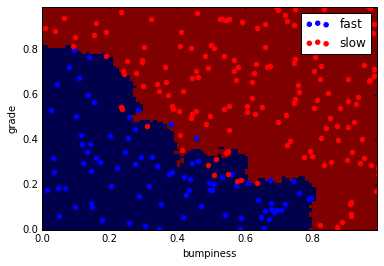

In [36]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=4) # n_neighbors number of neighbors to consider

clf.fit(features_train,labels_train)
pred = clf.predict(features_test)
acc = accuracy_score(labels_test,pred); print("Accuracy:",acc)
prettyPicture(clf, features_test, labels_test)

### Adaboost

http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html  

Looks to create a strong classifier from an ensemble (combination of several) weaker classifiers

Best used for boosting decision trees in binary classification.  
Particularly good at boosting low level decision trees (those with few levels or tiers of decision - decision stumps).  
Prediction derived from weighted average of weak classifiers.  

Accuracy: 0.924


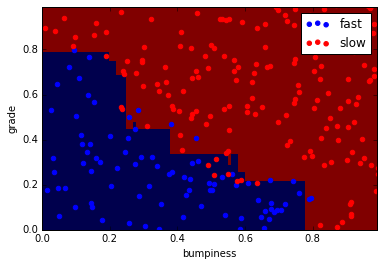

In [37]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier()

clf.fit(features_train,labels_train)
pred = clf.predict(features_test)
acc = accuracy_score(labels_test,pred); print("Accuracy:",acc)
prettyPicture(clf, features_test, labels_test)

### Random Forest
http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html  

Decision trees tend to overfit irregular patterns because they have low bias but very high variance, meaning they do not respond well to new instances.
#### Tree Bagging  
Random forest average Deep Decision Trees on subsets of the training set.  The goal is to decrease variance (generalize) at the cost of increased bias.  

Looks to improve results by taking the average of many trees.  Decreases Variance without increasing bias.  Noting that the decision of any given tree is sensitive to Noise in the input training set.
Random Forest augment of Tree Bagging is the addition of the random feature subset.  This is designed to reduce correlation amongst the final decision tree outcomes because certain input features will be most influential on the final tree prediction.  Causing the output trees to be correlated.  


Accuracy: 0.92


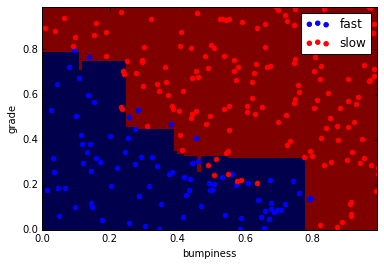

In [51]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(min_samples_split=50)

clf.fit(features_train,labels_train)
pred = clf.predict(features_test)
acc = accuracy_score(labels_test,pred); print("Accuracy:",acc)
prettyPicture(clf, features_test, labels_test)

### Handy Tools

#### Timing training and predicting data sets

In [2]:
from time import time
t0 = time()
#< your clf.fit() line of code >
print("training time:", round(time()-t0, 3), "s")

training time: 0.0 s


#### Accuracy Score
Calculate the accuracy between the test data and known datapoints

In [7]:
labels_test =[1]; predicted = [1]
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(labels_test,predicted)
print(accuracy)

1.0
